In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sys

# Import LogoMaker
sys.path.append('../../')
import logomaker

%matplotlib inline
plt.ion()

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Load splice site sequences and counts
df_GT = pd.read_excel('../data/human_splice_sites.xlsx',parse_cols=[0,1]).dropna()
df_GC = pd.read_excel('../data/human_splice_sites.xlsx',parse_cols=[6,7]).dropna()
seq_list = list(df_GT.iloc[:,1]) + list(df_GC.iloc[:,1])
counts_list = list(df_GT.iloc[:,0]) + list(df_GC.iloc[:,0])

In [4]:
# Create counts_mat
counts_mat = logomaker.load_alignment(sequences=seq_list, 
                                      sequence_counts=counts_list)
counts_mat = counts_mat.loc[:,list('ACGT')]
counts_mat.drop([3,4],axis=0,inplace=True)
counts_mat.index = [-3,-2,-1,2,3,4,5]
#counts_mat.rename(columns={'T':'V'}, inplace=True)
#counts_mat = counts_mat.loc[:,['A','C']]
counts_mat.head()

,A,C,G,T
-3,65712.0,69955.0,37508.0,29589.0
-2,126104.0,22507.0,25802.0,28351.0
-1,25829.0,6317.0,153710.0,16908.0
2,115788.0,8742.0,68773.0,9461.0
3,132301.0,18544.0,25813.0,26105.0


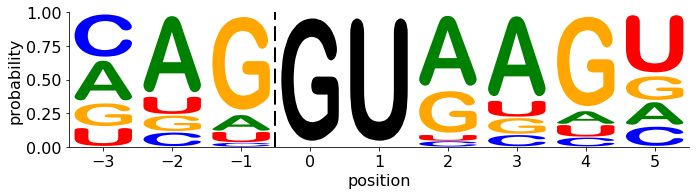

In [27]:
gridline_param_dict = {'show_gridlines':False}
fullheight_style_dict = {
                        'fullheight':{0:'G',1:'U'},
                        'fullheight_colors':'black',
                        'fullheight_boxcolors':'white',
                        }

# Make all logo types
logo = logomaker.make_logo(dataframe=counts_mat,
                           #style_sheet='dark_background',
                           gridline_param_dict = gridline_param_dict,
                           fullheight_style_dict=fullheight_style_dict,
                           matrix_type='probability',
                           sequence_type='RNA',
                           axes_type='classic',
                           character_style_dict={'character_colors':'classic'},
                           hpad=.2,
                           vpad=.1,
                           figsize=[10,3]       )
plt.axvline(x=-0.5,linewidth=4,linestyle='--',color='black')
plt.rcParams.update({'font.size': 16})
plt.xlabel('position')
plt.ylabel('probability')
plt.tight_layout()

plt.savefig('../output/splicesite_logo.pdf')